## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Universal format for floats
pd.options.display.float_format = '{:,.2f}'.format

# Study data files
study_results_path = "csv/input/Study_results.csv"
mouse_metadata_path = "csv/input/Mouse_metadata.csv"

# Read the mouse data and the study results
results_df = pd.read_csv(study_results_path)
meta_df = pd.read_csv(mouse_metadata_path)

In [2]:
# Checking the number of mice before cleaning.
print(f"Number of mice before clean: {results_df['Mouse ID'].nunique()}")

Number of mice before clean: 249


In [3]:
# Check for mice with duplicate timepoints & remove
results_df = results_df.groupby('Mouse ID').filter(lambda x: x['Timepoint'].value_counts().max() < 2)

In [4]:
# Checking the number of mice in the clean DataFrame.
print(f"Number of mice post-clean: {results_df['Mouse ID'].nunique()}")

Number of mice post-clean: 248


In [5]:
# Combine the data into a single dataset
results_df = meta_df.merge(results_df, left_on='Mouse ID', right_on='Mouse ID')

# Display the data table for preview
results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_data = results_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_dct = {
    'Mean': tumor_data.mean(),
    'Median': tumor_data.median(),
    'Variance': tumor_data.var(),
    'Std Dev': tumor_data.std(),
    'SEM': tumor_data.sem()
}

tumor_summary_1 = pd.DataFrame(tumor_dct)
tumor_summary_1

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_2 = tumor_data.agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_summary_2 = tumor_summary_2.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Std Dev', 'sem': 'SEM'})
tumor_summary_2

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

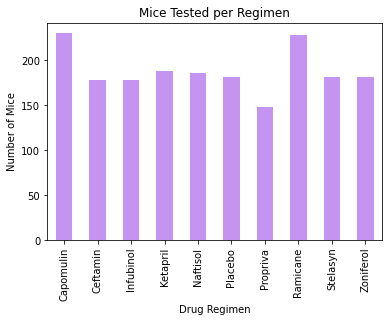

In [86]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

results_df.groupby('Drug Regimen')['Mouse ID'].count().plot(kind='bar', width=0.5, color='blueviolet', alpha=0.5)
plt.title('Mice Tested per Regimen')
plt.ylabel('Number of Mice')
plt.show()

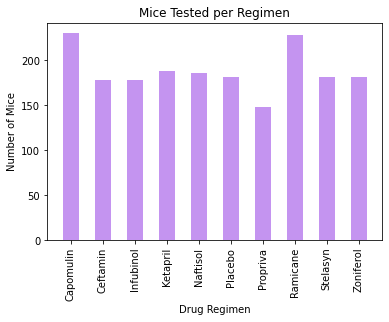

In [88]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

regimen_df = pd.DataFrame(results_df.groupby('Drug Regimen')['Mouse ID'].count().reset_index())
regimen_df = regimen_df.rename(columns={'Mouse ID': 'Number of Mice'})
plt.bar(regimen_df['Drug Regimen'], regimen_df['Number of Mice'], width=0.5, color='blueviolet', alpha=0.5)
plt.title('Mice Tested per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=90)
plt.show()

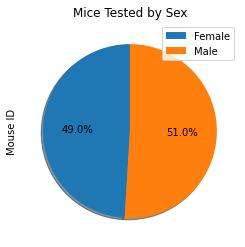

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = results_df.groupby('Sex')['Mouse ID'].count()
gender_counts.plot.pie(autopct='%1.1f%%', labeldistance=None, shadow=True, startangle=90)
plt.title('Mice Tested by Sex')
plt.legend()
plt.show()

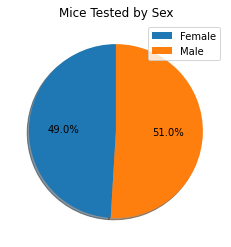

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_counts, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Mice Tested by Sex')
plt.legend(gender_counts.index.values)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = pd.DataFrame(results_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max()).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tvol = pd.merge(results_df, max_timepoints, left_on=['Mouse ID', 'Timepoint'], right_on=['Mouse ID', 'Timepoint'], suffixes=('', '_right'))
final_tvol = final_tvol.drop(columns=['Drug Regimen_right'])
final_tvol.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.05,1
1,s185,Capomulin,Female,3,17,45,23.34,1
2,x401,Capomulin,Female,16,15,45,28.48,0
3,m601,Capomulin,Male,22,17,45,28.43,1
4,g791,Ramicane,Male,11,16,45,29.13,1


In [13]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

tvol_agg = final_tvol.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'var', 'std', 'sem', q1, 'median', q3, iqr]})
tvol_agg = tvol_agg.rename(columns={'mean': 'Mean', 'var': 'Variance', 'std': 'Std Dev', 'sem': 'SEM', 'q1': 'Q1', 'median': 'Q2', 'q3': 'Q3', 'iqr': 'IQR'})
tvol_agg = tvol_agg.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
tvol_agg.columns = tvol_agg.columns.get_level_values(1)
tvol_agg['Lower Bound'] = tvol_agg['Q1'] - 1.5 * tvol_agg['IQR']
tvol_agg['Upper Bound'] = tvol_agg['Q3'] + 1.5 * tvol_agg['IQR']
tvol_agg

,Mean,Variance,Std Dev,SEM,Q1,Q2,Q3,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,,,,,,
Capomulin,36.67,32.66,5.72,1.14,32.38,38.13,40.16,7.78,20.70,51.83
Ramicane,36.19,32.17,5.67,1.13,31.56,36.56,40.66,9.10,17.91,54.31
Infubinol,58.18,74.01,8.60,1.72,54.05,60.17,65.53,11.48,36.83,82.74
Ceftamin,57.75,69.98,8.37,1.67,48.72,59.85,64.30,15.58,25.36,87.67


In [95]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = list(tvol_agg.index.values)
regimen_data = []

for regimen in regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tvol_df = final_tvol.groupby('Drug Regimen').get_group(regimen)
    volumes = [vol for vol in tvol_df['Tumor Volume (mm3)']]
    
    # Determine outliers using upper and lower bounds
    q1, q3 = (tvol_df['Tumor Volume (mm3)'].quantile(0.25), tvol_df['Tumor Volume (mm3)'].quantile(0.75))
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = filter(lambda vol: vol < lower_bound or vol > upper_bound, volumes)
    
    result = {
        'regimen': regimen,
        'volumes': volumes,
        'outliers': list(outliers)
    }
    regimen_data.append(result)

print(regimen_data)

[{'regimen': 'Capomulin', 'volumes': [23.34359787, 28.48403281, 28.43096411, 30.48598484, 31.02392294, 31.896238399999998, 32.37735684, 33.32909778, 34.45529799, 37.31184577, 36.04104736, 37.07402422, 38.84687569, 38.93963263, 38.98287774, 38.75326548, 38.125164399999996, 39.95234669, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 47.68596303, 46.53920617], 'outliers': []}, {'regimen': 'Ramicane', 'volumes': [22.05012627, 29.12847181, 30.27623175, 30.56462509, 30.63869575, 31.56046955, 31.09533505, 33.39765251, 32.97852192, 33.56240217, 36.13485243, 38.81036633, 37.22565033, 36.37451039, 36.56165229, 37.31123552, 38.34200823, 38.407618299999996, 40.65900627, 40.66771292, 45.22086888, 43.04754260000001, 43.41938077, 43.16637266, 44.18345092], 'outliers': []}, {'regimen': 'Infubinol', 'volumes': [67.97341878, 65.52574285, 57.03186187, 66.08306589, 72.2267309, 36.321345799999996, 60.96971133, 62.43540402, 60.91876652, 67.28962147, 66.19691151, 62.11727887, 47.01036401, 60

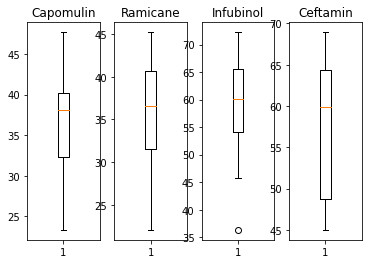

In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
i = 0
for ax in (ax1, ax2, ax3, ax4):
    ax.boxplot(regimen_data[i]['volumes'])
    ax.set_title(regimen_data[i]['regimen'])
    i += 1

plt.show()

## Line and Scatter Plots

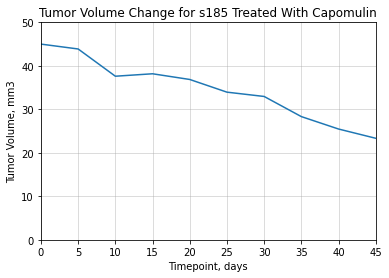

In [57]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = results_df.groupby('Drug Regimen').get_group('Capomulin')
mouse_data = mouse_data.groupby('Mouse ID').get_group('s185')
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume Change for s185 Treated With Capomulin')
plt.xlabel('Timepoint, days')
plt.ylabel('Tumor Volume, mm3')
plt.xlim(0, 45)
plt.ylim(0, 50)
plt.xticks(mouse_data['Timepoint'])
plt.grid(c='darkgrey', alpha=0.5)
plt.show()

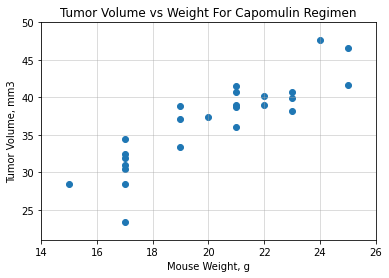

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_data = final_tvol.groupby('Drug Regimen').get_group('Capomulin')
plt.scatter(weight_data['Weight (g)'], weight_data['Tumor Volume (mm3)'])
plt.title('Tumor Volume vs Weight For Capomulin Regimen')
plt.xlabel('Mouse Weight, g')
plt.ylabel('Tumor Volume, mm3')
plt.xlim(round(weight_data['Weight (g)'].min() - 1), round(weight_data['Weight (g)'].max() + 1))
plt.ylim(round(weight_data['Tumor Volume (mm3)'].min() - 2), round(weight_data['Tumor Volume (mm3)'].max() + 2))
plt.grid(c='darkgrey', alpha=0.5)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(weight_data['Weight (g)'], weight_data['Tumor Volume (mm3)'])